# Importing Libraries

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Uploading Dataset

In [3]:
data_set=pandas.read_csv('drug200.xls')

# Data Analysis (Exploratory)

In [4]:
data_set.shape

(200, 6)

In [5]:
data_set.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
data_set.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
data_set.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No missing or null values in the data set

Data Variables : 200

Features: 6(including the label)


## Feature Analysis

In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Age:

Age of the patients

In [9]:
ages=data_set['Age']
maximum_age=numpy.max(ages)
minimum_age=numpy.min(ages)
print("Maximum age: ",maximum_age)
print("Minimum age: ",minimum_age)

Maximum age:  74
Minimum age:  15


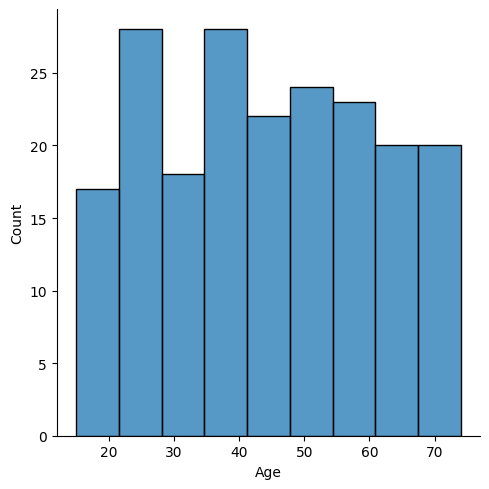

In [10]:
age=data_set['Age']
seaborn.displot(age)

Age Range : 15-74

## Sex:

Sex of the patients

In [11]:
ds=data_set.groupby('Sex').size()
print(ds)

Sex
F     96
M    104
dtype: int64


<Axes: xlabel='count', ylabel='Sex'>

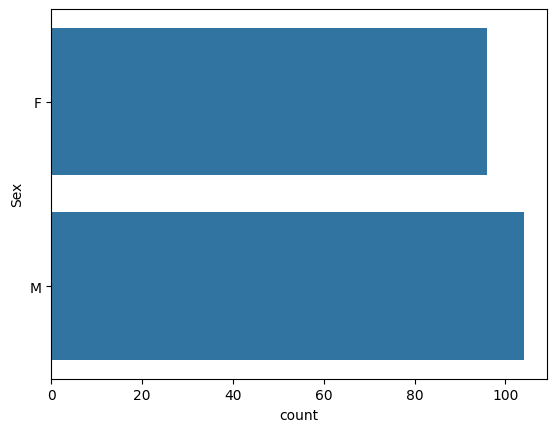

In [12]:
s=data_set['Sex']
seaborn.countplot(s)

The Sex Ratio seems to be balanced.

We convert the sex to numeric by label encoder in python as it is categorical value.

## Blood Pressure (BP):

Blood Pressure of the patients

In [13]:
ds=data_set.groupby('BP').size()
print(ds)

BP
HIGH      77
LOW       64
NORMAL    59
dtype: int64


<Axes: xlabel='count', ylabel='BP'>

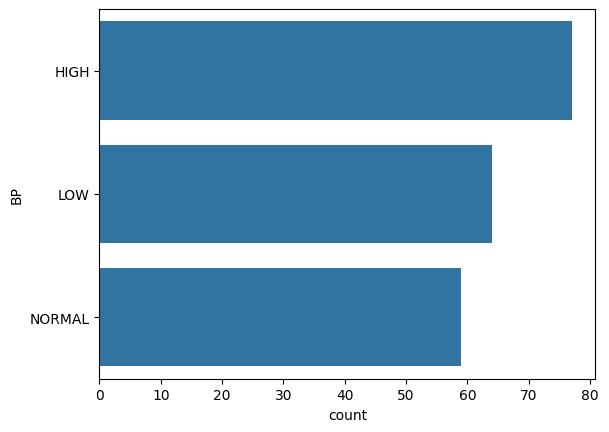

In [14]:
bp=data_set['BP']
seaborn.countplot(bp)

The BP Ratio seems to be balanced.

We convert the BP to numeric by label encoder in python as it is categorical value.

## Cholesterol:

Cholesterol of the patients

In [15]:
ds=data_set.groupby('Cholesterol').size()
print(ds)

Cholesterol
HIGH      103
NORMAL     97
dtype: int64


<Axes: xlabel='count', ylabel='Cholesterol'>

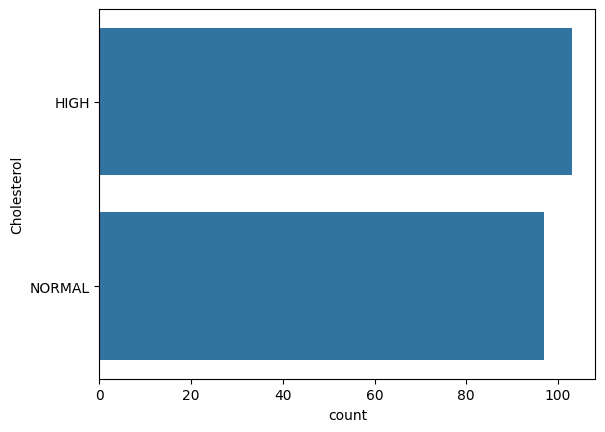

In [16]:
ch=data_set['Cholesterol']
seaborn.countplot(ch)

The Cholesterol Ratio seems to be balanced.

We convert the Cholesterol to numeric by label encoder in python as it is categorical value.

## Na_to_K:

Sodium-Potassium ration in patient's blood

In [17]:
max_Na_to_K=max(data_set['Na_to_K'])
min_Na_to_K=min(data_set['Na_to_K'])
print('Maximum Sodium-Potassium ratio:', max_Na_to_K)
print('Minimum Sodium-Potassium ratio:', min_Na_to_K)

Maximum Sodium-Potassium ratio: 38.247
Minimum Sodium-Potassium ratio: 6.269


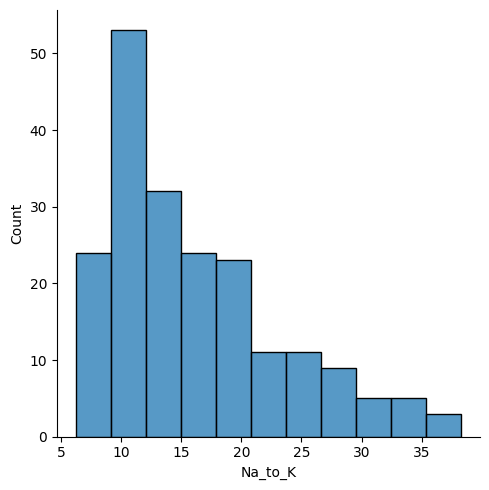

In [18]:
NaK=data_set['Na_to_K']
seaborn.displot(NaK)

Sodium-Potassium ratio ranges from 6.269 to 38.247

## Drug:

Drug administered to the patients

In [19]:
ds=data_set.groupby('Drug').size()
print(ds)

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64


<Axes: xlabel='count', ylabel='Drug'>

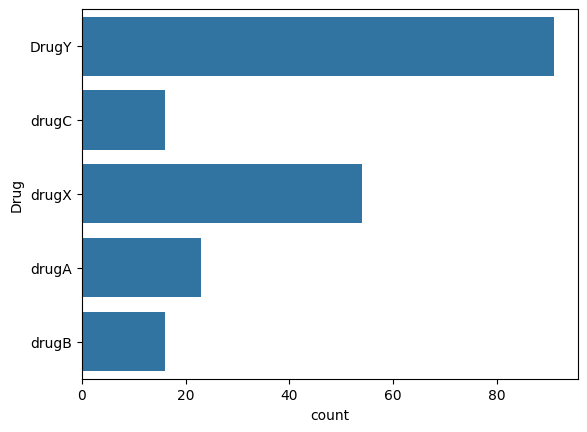

In [20]:
drug=data_set['Drug']
seaborn.countplot(drug)

Target column(value): Drug

# Relationship (Features-Target Value)

## Age to Drug

Text(0.5, 1.0, 'Age to Drug')

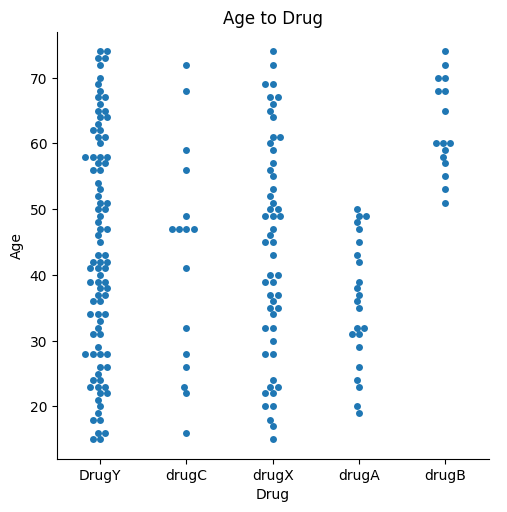

In [21]:
seaborn.catplot(x="Drug", y="Age", data=data_set, kind="swarm")
plt.title("Age to Drug")

In [22]:
max_age_A=data_set.Age[data_set.Drug=="drugA"].max()
min_age_B=data_set.Age[data_set.Drug=="drugB"].min()
print('Maximum Age for adminstrating Drug A:', max_age_A)
print('Minimum Age for adminstrating Drug B:', min_age_B)

Maximum Age for adminstrating Drug A: 50
Minimum Age for adminstrating Drug B: 51


Adminstration of Drug A is being to pateints below 50 years

Adminstration of Drug B is being to pateints above 51 years

## Sex to Drug

Text(0.5, 1.0, 'Sex to Drug')

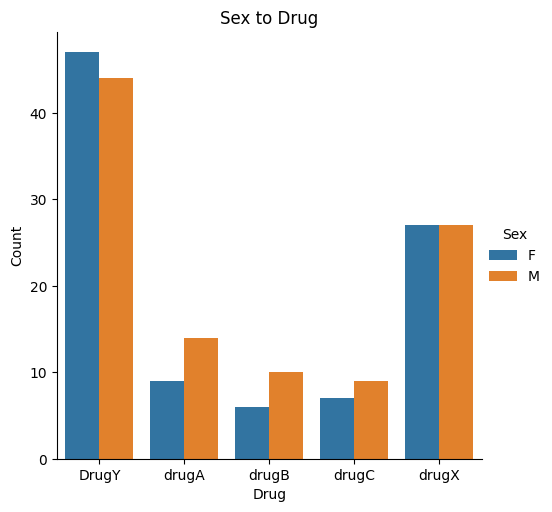

In [23]:
sd=data_set.groupby(['Drug','Sex'])
count_sd=sd.size().reset_index(name='Count')
seaborn.catplot(x="Drug",y="Count",hue='Sex',data=count_sd, kind='bar')
plt.title("Sex to Drug")

This graph determines that-:

For classification, the fetaure 'Sex' is not very important.

## Blood Pressure to Drug

Text(0.5, 1.0, 'BP to Drug')

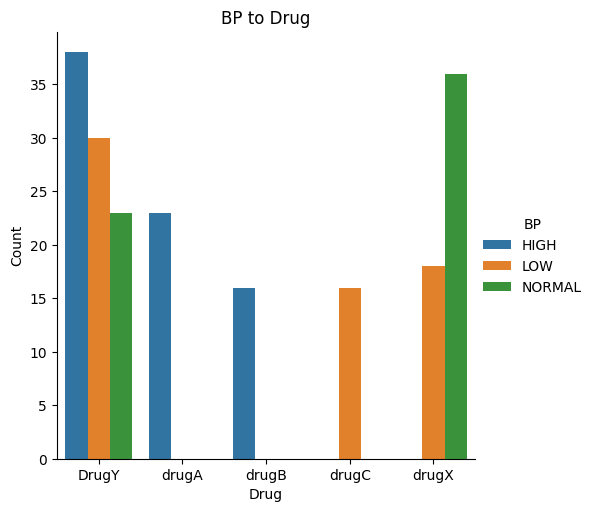

In [24]:
bpd=data_set.groupby(['Drug','BP'])
count_bpd=bpd.size().reset_index(name='Count')
seaborn.catplot(x="Drug",y="Count",hue='BP',data=count_bpd, kind='bar')
plt.title("BP to Drug")

BP : An important feature for classification

High BP : Drug A and Drug B

Low BP  : Drug C

## Cholesterol to Drug

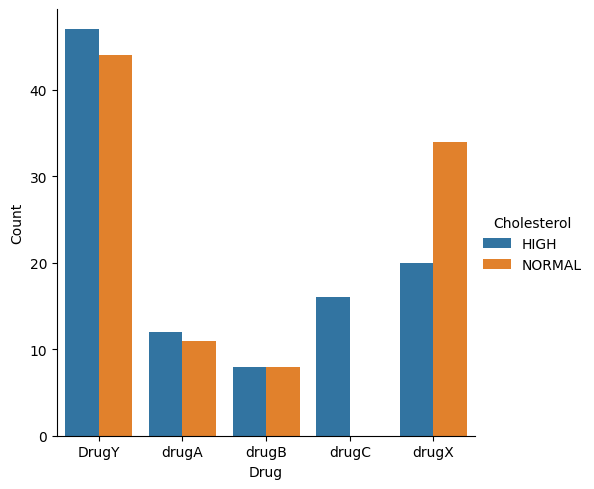

In [25]:
chd=data_set.groupby(['Drug','Cholesterol'])
count_chd=chd.size().reset_index(name='Count')
seaborn.catplot(x="Drug",y="Count",hue='Cholesterol',data=count_chd, kind='bar')

Cholesterol : An important feature for classification of Drug C

High Cholesterol : Drug c


## Na_to_K to Drug

Text(0.5, 1.0, 'Na_to_K - Drug')

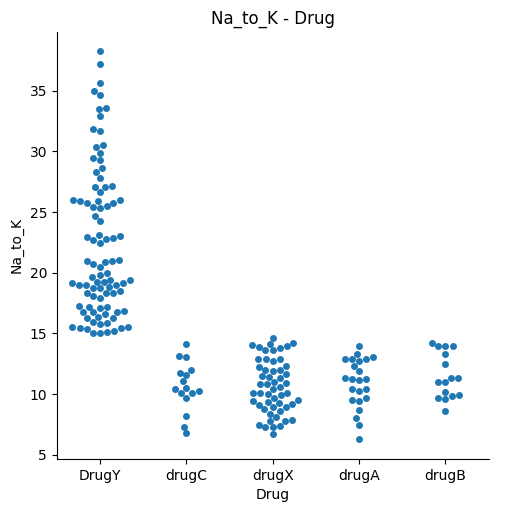

In [26]:
seaborn.catplot(x="Drug", y="Na_to_K", data=data_set, kind='swarm')
plt.title("Na_to_K - Drug")

In [27]:
min_Na_to_k=data_set.Na_to_K[data_set.Drug=="DrugY"].min()
print("Minimum value of Na_to_K for DrugY:", min_Na_to_k)

Minimum value of Na_to_K for DrugY: 15.015


For better classification of Drug Y, a new can be created from this feature.

Na_to_K ratio > 15 : Drug Y

# Data Pre-Processing

## Feature Engineering

In [28]:
data_set['Na_to_K>15']=numpy.where(data_set['Na_to_K']>15,1,0)

## Label Encoding

In [29]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [30]:
label_encode_list=['Sex','BP','Cholesterol','Na_to_K>15','Drug']
for i in label_encode_list:
  data_set[i]=label.fit_transform(data_set[i])

In [31]:
data_set.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K>15
0,23,0,0,0,25.355,0,1
1,47,1,1,0,13.093,3,0
2,47,1,1,0,10.114,3,0
3,28,0,2,0,7.798,4,0
4,61,0,1,0,18.043,0,1


# Splitting Dataset (Training-Testing)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x=data_set.drop(['Drug'], axis=1)
y=data_set.Drug

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [35]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [36]:
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

x_train shape (160, 6)
x_test shape (40, 6)
y_train shape (160, 1)
y_test shape (40, 1)


# Models used

## KNN Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

In [38]:
knn.score(x_test,y_test)

0.7

In [39]:
grid={'n_neighbors':numpy.arange(1,120), 'p':numpy.arange(1,3), 'weights':['uniform','distance']}

knn_cv=GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)
knn_cv_pred=knn_cv.predict(x_test)

In [40]:
knn_cv.score(x_test,y_test)

0.75

In [41]:
knn_cv.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg_pred=log_reg.predict(x_test)

In [43]:
log_reg.score(x_test,y_test)

0.875

In [44]:
grid = {'penalty':['l1','l2'], 'C':numpy.logspace(-3,3,7), 'solver':['liblinear','saga']}
log_reg_cv=GridSearchCV(log_reg,grid,cv=5)
log_reg_cv.fit(x_train,y_train)
log_reg_cv_pred=log_reg.predict(x_test)

In [45]:
log_reg_cv.score(x_test,y_test)

1.0

In [46]:
log_reg_cv.best_params_

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}

## Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
n_bayes=GaussianNB()
n_bayes.fit(x_train,y_train)
n_bayes_pred=n_bayes.predict(x_test)

In [48]:
n_bayes.score(x_test,y_test)

1.0

In [49]:
grid = {}
n_bayes_cv=GridSearchCV(n_bayes,grid,cv=5)
n_bayes_cv.fit(x_train,y_train)
n_bayes_cv_pred=log_reg.predict(x_test)

In [50]:
n_bayes_cv.score(x_test,y_test)

1.0

## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
random_state=42
rand_fc=RandomForestClassifier(random_state)
rand_fc.fit(x_train,y_train)
rand_fc_pred=rand_fc.predict(x_test)

In [52]:
print(numpy.mean(cross_val_score(rand_fc, x_train, y_train, cv=5)))
#m=numpy.mean(cross_val_score(rand_fc, x_train, y_train, cv=5))
#print(m)
rand_fc.score(x_test,y_test)

0.98125


0.975

In [53]:
grid={'n_estimators':numpy.arange(100,1000,100), 'criterion':['gini','entropy']}
rand_fc_cv=GridSearchCV(rand_fc, param_grid=grid, cv=5)
rand_fc_cv.fit(x_train,y_train)
rand_fc_cv_pred=rand_fc.predict(x_test)

In [54]:
rand_fc_cv.score(x_test,y_test)

0.975

In [55]:
print(rand_fc_cv.best_score_)
rand_fc_cv.best_params_

0.99375


{'criterion': 'gini', 'n_estimators': 700}

# Model's perfromance metrices

## Accuracy

### Without GridSearchCV

In [56]:
accuracy_knn=knn.score(x_test,y_test)
accuracy_log_reg=log_reg.score(x_test,y_test)
accuracy_n_bayes=n_bayes.score(x_test,y_test)
accuracy_rand_fc=rand_fc.score(x_test,y_test)

In [57]:
print(accuracy_knn, accuracy_log_reg, accuracy_n_bayes, accuracy_rand_fc)

0.7 0.875 1.0 0.975


### With GridSearchCV

In [58]:
accuracy_cv_knn=knn_cv.score(x_test,y_test)
accuracy_cv_log_reg=log_reg_cv.score(x_test,y_test)
accuracy_cv_n_bayes=n_bayes_cv.score(x_test,y_test)
accuracy_cv_rand_fc=rand_fc_cv.score(x_test,y_test)

In [59]:
print(accuracy_cv_knn, accuracy_cv_log_reg, accuracy_cv_n_bayes, accuracy_cv_rand_fc)

0.75 1.0 1.0 0.975


### Confuion Matrix

#### Without GridSearchCV

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

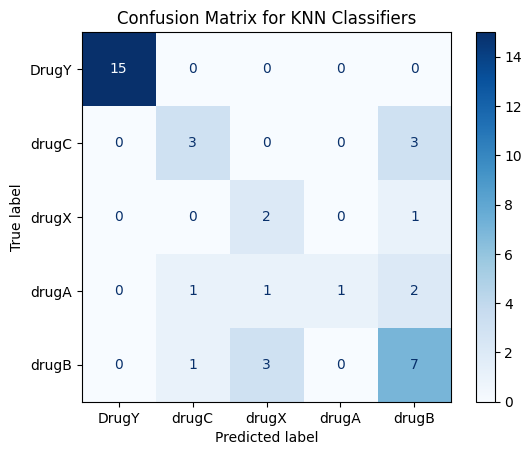

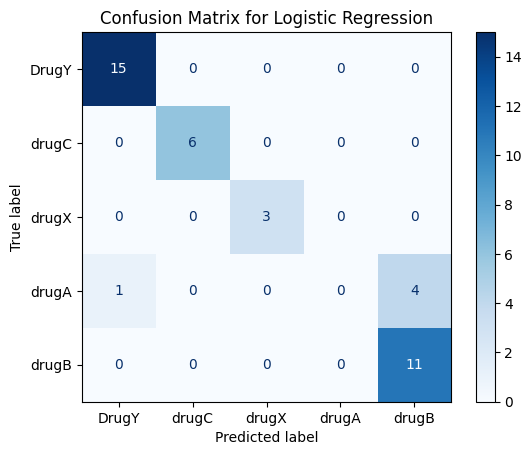

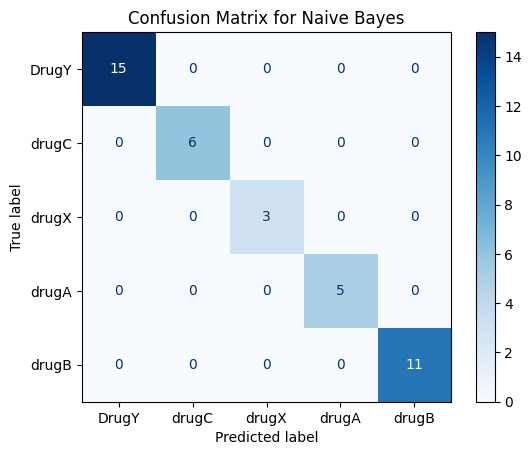

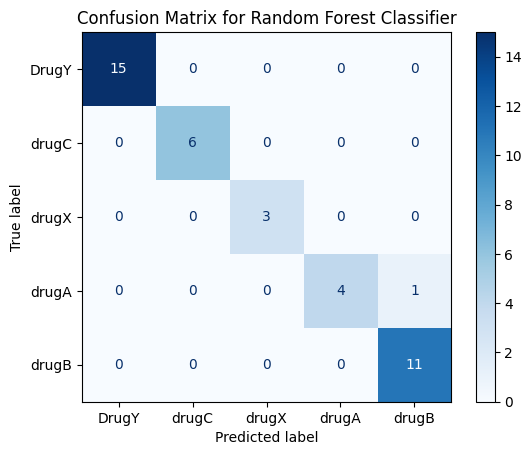

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

class_names=['DrugY','drugC','drugX','drugA','drugB']

cm_knn=confusion_matrix(y_test, knn.predict(x_test))
display_knn=ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
display_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN Classifiers')

cm_log_reg=confusion_matrix(y_test, log_reg.predict(x_test))
display_log_reg=ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=class_names)
display_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')

cm_n_bayes=confusion_matrix(y_test, n_bayes.predict(x_test))
display_n_bayes=ConfusionMatrixDisplay(confusion_matrix=cm_n_bayes, display_labels=class_names)
display_n_bayes.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')

cm_rand_fc=confusion_matrix(y_test, rand_fc.predict(x_test))
display_rand_fc=ConfusionMatrixDisplay(confusion_matrix=cm_rand_fc, display_labels=class_names)
display_rand_fc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')

#### With GridSearchCV

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

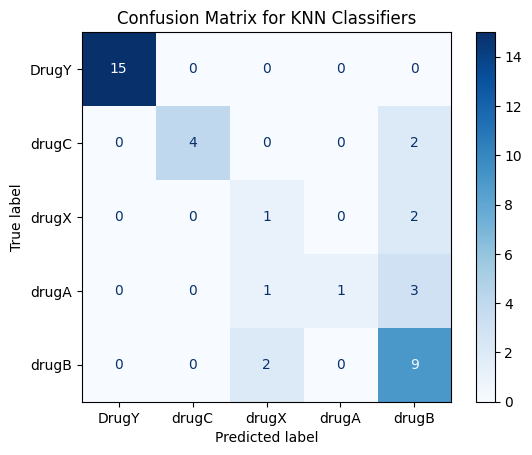

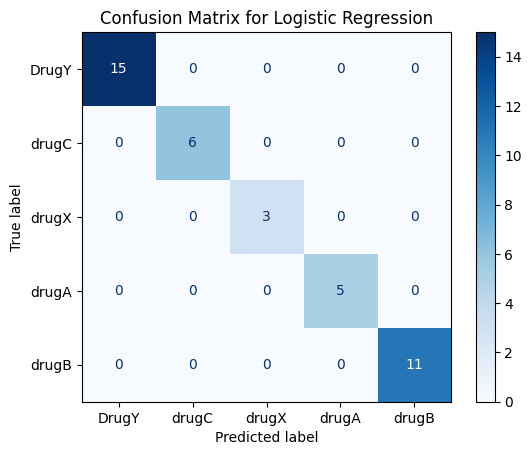

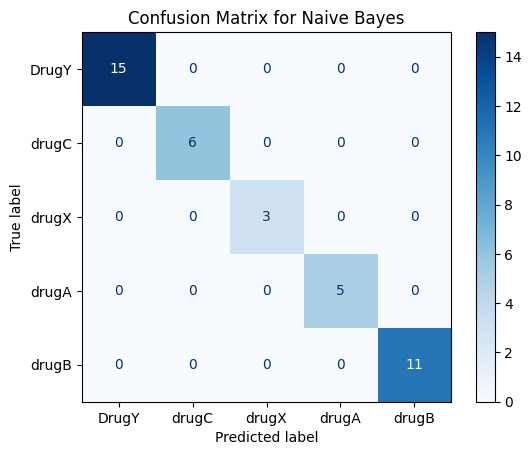

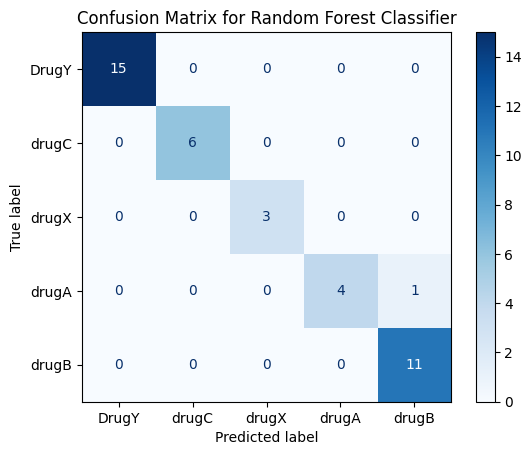

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

class_names=['DrugY','drugC','drugX','drugA','drugB']

cm_knn=confusion_matrix(y_test, knn_cv.predict(x_test))
display_knn=ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
display_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN Classifiers')

cm_log_reg=confusion_matrix(y_test, log_reg_cv.predict(x_test))
display_log_reg=ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=class_names)
display_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')

cm_n_bayes=confusion_matrix(y_test, n_bayes_cv.predict(x_test))
display_n_bayes=ConfusionMatrixDisplay(confusion_matrix=cm_n_bayes, display_labels=class_names)
display_n_bayes.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes')

cm_rand_fc=confusion_matrix(y_test, rand_fc_cv.predict(x_test))
display_rand_fc=ConfusionMatrixDisplay(confusion_matrix=cm_rand_fc, display_labels=class_names)
display_rand_fc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')

## Report

### Without GridSearchCV

In [62]:
from sklearn.metrics import classification_report

report_knn=classification_report(y_test, knn_pred, target_names=class_names)
report_log_reg=classification_report(y_test, log_reg_pred, target_names=class_names)
report_n_bayes=classification_report(y_test, n_bayes_pred, target_names=class_names)
report_rand_fc=classification_report(y_test, rand_fc_pred, target_names=class_names)

In [63]:
print(report_knn, report_log_reg, report_n_bayes, report_rand_fc, sep='\n\n')

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugC       0.60      0.50      0.55         6
       drugX       0.33      0.67      0.44         3
       drugA       1.00      0.20      0.33         5
       drugB       0.54      0.64      0.58        11

    accuracy                           0.70        40
   macro avg       0.69      0.60      0.58        40
weighted avg       0.76      0.70      0.69        40


              precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        15
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00         3
       drugA       0.00      0.00      0.00         5
       drugB       0.73      1.00      0.85        11

    accuracy                           0.88        40
   macro avg       0.73      0.80      0.76        40
weighted avg       0.78      0.88      0.82        40


              precis

### With GridSearchCV

In [64]:
from sklearn.metrics import classification_report

report_knn=classification_report(y_test, knn_cv_pred, target_names=class_names)
report_log_reg=classification_report(y_test, log_reg_cv_pred, target_names=class_names)
report_n_bayes=classification_report(y_test, n_bayes_cv_pred, target_names=class_names)
report_rand_fc=classification_report(y_test, rand_fc_cv_pred, target_names=class_names)

In [65]:
print(report_knn, report_log_reg, report_n_bayes, report_rand_fc, sep='\n\n')

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugC       1.00      0.67      0.80         6
       drugX       0.25      0.33      0.29         3
       drugA       1.00      0.20      0.33         5
       drugB       0.56      0.82      0.67        11

    accuracy                           0.75        40
   macro avg       0.76      0.60      0.62        40
weighted avg       0.82      0.75      0.74        40


              precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        15
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00         3
       drugA       0.00      0.00      0.00         5
       drugB       0.73      1.00      0.85        11

    accuracy                           0.88        40
   macro avg       0.73      0.80      0.76        40
weighted avg       0.78      0.88      0.82        40


              precis